Species     0
Weight      0
V_length    0
D_length    0
C_length    0
Height      0
Width       0
dtype: int64

Accuracy: 0.8125


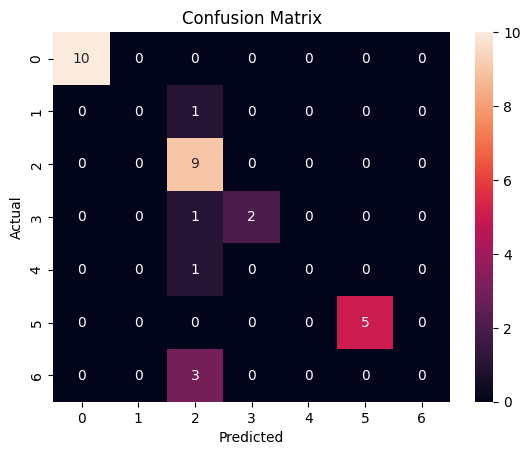

In [1]:
import pandas as p
import seaborn as s
import matplotlib.pyplot as m

# Load the dataset
da = p.read_csv("Fish.csv")

# Check for missing values
print(da.isna().sum())

# Define the feature matrix X and target vector y
x = da.iloc[:, 1:]
y = da.loc[:, 'Species']

# Scaling the features
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
x = sca.fit_transform(x)

# Transform the target variable y using Label Encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(x_train, y_train)

# Make predictions on the test set
y_pred = mod.predict(x_test)

# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Generate the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
s.heatmap(cm, annot=True)
m.xlabel("Predicted")
m.ylabel("Actual")
m.title("Confusion Matrix")
m.show()